In [16]:
import requests
from typing import Dict, List, Tuple
import csv
import random
from collections import defaultdict
from lib import *

In [9]:
# Load dataset
data = requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)

with open('iris.data', 'w') as f:
    f.write(data.text)

In [10]:
def parse_iris_row(row: List[str]) -> LabeledPoint:
    measurements = [float(value) for value in row[:-1]]
    label = row[-1].split("-")[-1]

    return LabeledPoint(measurements, label)

In [11]:
iris_data = []

with open('iris.data') as f:
    reader = csv.reader(f)
    for row in reader:
        if row:  # Skip empty rows
            try:
                iris_data.append(parse_iris_row(row))
            except ValueError as e:
                print(e)

In [12]:
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

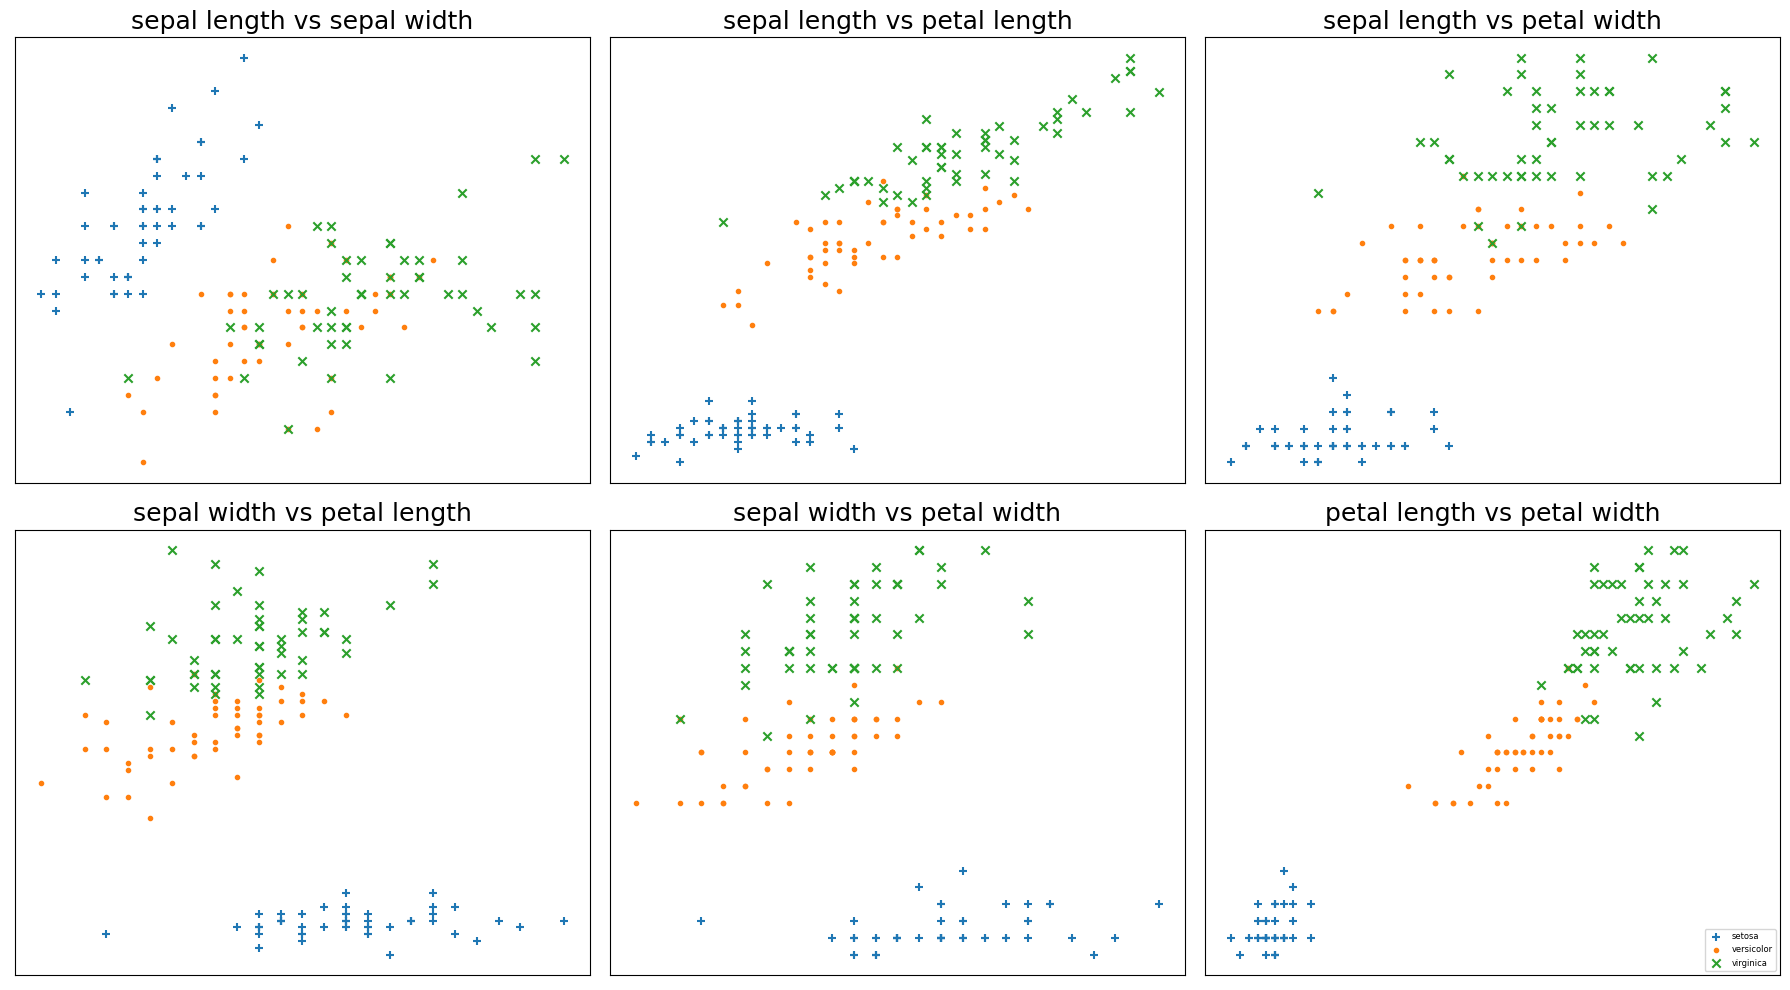

In [13]:
from matplotlib import pyplot as plt
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x'] 

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row, col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=18)
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])

        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row, col].scatter(xs, ys, marker=mark, label=species)


ax[-1, -1].legend(loc='lower right', prop={'size': 6})
plt.tight_layout()
plt.show()

In [15]:
# split the data into a test set and a training set
random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)
assert len(iris_train) == 0.7 * 150
assert len(iris_test) == 0.3 * 150

In [29]:
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

for iris in iris_test:
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label

    if predicted == actual:
        num_correct += 1

    confusion_matrix[(predicted, actual)] += 1

pct_correct = num_correct / len(iris_test)

In [30]:
pct_correct

0.9777777777777777

In [31]:
confusion_matrix

defaultdict(int,
            {('setosa', 'setosa'): 13,
             ('versicolor', 'versicolor'): 15,
             ('virginica', 'virginica'): 16,
             ('virginica', 'versicolor'): 1})